# Neural netwerk met matrices #

#### Imports

In [102]:
import numpy as np
import random
from matplotlib import pyplot as plt
from data import training_set, test_set

#### Activatie functies
De softmax activatie functie verdeelt alle outputwaarden over een range tussen 0 en 1. Alle outputs van softmax opgeteld is weer 1 daardoor kan het gebruikt worden om probability te bepalen.

De sigmoid activatiefunctie verdeelt alle outputwaarden over een bereik tussen 0 en 1 (of -1 en 1). Een belangrijk kenmerk van de sigmoidfunctie is dat extreme (hoge of lage) inputwaarden weinig invloed hebben op de output, terwijl inputwaarden in het midden van het bereik een grotere invloed hebben.

De sigmoid derivative berekent de afgeleide van de sigmoid functie. Dit wordt verder gebruikt voor de steepest descent in de back propagation.

In [103]:

def softmax(input):
    output = np.exp(input) / sum(np.exp(node) for node in input)
    return output

def sigmoid(input):
    output = 1 / (1 + np.exp(-input)) 
    return output

def sigmoid_derivative(input):
    x = sigmoid(input)
    output = x * (1- x)
    return output


#### Back propagation
Voor backprop wordt allereerst de error berekend. De output error wordt vermenigvuldigt met de richtingscoefficent van de activatiefunctie. De output delta wijst in de richting van het minimum omdat de output nodes van de targets afgetrokken worden.

De hidden error kan berekend worden door het dotproduct van de output delta met de getransponeerde weights hidden. Vervolgens wordt weer de afgeleide gebruikt om een vector in de richting van een minimum te krijgen. 

De delta's worden aan de weights toegevoegd zodat het netwerk "leert".

Uiteindelijk wordt de loss van deze iteratie berekend voor de cost functie

In [104]:
def backpropagation(targets, output_nodes, hidden_nodes):
    global learning_rate, weights_hidden, weights_input, bias_hidden, bias_output, input_nodes
    # Backward propogation met steepest descent
    output_error = np.subtract(targets, output_nodes) 
    output_delta = output_error * sigmoid_derivative(output_nodes)

    hidden_error = output_delta.dot(weights_hidden.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_nodes)

    weights_hidden += hidden_nodes.T.dot(output_delta) * learning_rate
    weights_input  += input_nodes.dot(hidden_delta) * learning_rate

    bias_output += np.sum(output_delta, axis=0) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0) * learning_rate

    # Compute the loss (mean squared error)
    return np.mean(np.square(output_error))
    

#### Train functie 

In [105]:

def train(learning_rate, epochs):
    global maxCost, input_nodes, weights_hidden, weights_input, bias_output, bias_hidden
    plotdata = []
    for epoch in range(epochs):
        epoch_loss = 0
        for example, target in training_set:
            inputs = np.array(example).flatten().reshape(-1, 1)
            input_nodes = inputs
                        
            # Forward pass
            hidden_nodes = np.dot(input_nodes.T, weights_input) + bias_hidden
            hidden_nodes = sigmoid(hidden_nodes)

            output_nodes = np.dot(hidden_nodes, weights_hidden) + bias_output
            output_nodes = sigmoid(output_nodes)                

            targets = [1.0, 0.0] if target == "O" else [0.0, 1.0]

            epoch_loss += backpropagation(targets, output_nodes, hidden_nodes)

        plotdata.append(epoch_loss/len(training_set))

        # Print average loss for the epoch
        # print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(training_set)}")

        if(epoch_loss < maxCost):
            print("Training is klaar bij epoch: ", epoch)
            print("Cost: ", epoch_loss)
            # plt.xlabel("Epochs")
            # plt.ylabel("Cost")
            # plt.plot(np.arange(epoch+1),plotdata)
            return epoch
    print("Cost: ", epoch_loss)
    plt.plot(np.arange(epoch+1),plotdata)

#### Prediction functie
Door het dot product van de inputnodes en de input weigts te nemen, kunnen de waardes van de hidden nodes berekend worden. Hetzelfde geldt voor het bereken van de outputnodes. Bij elke layer wordt er ook een activatie functie toegepast om de output te beinvloeden.

In [106]:

def forward():
    global input_nodes, weights_input, weights_hidden, biases

    # Forward pass
    hidden_nodes = np.dot(input_nodes.T, weights_input) + bias_hidden
    hidden_nodes = sigmoid(hidden_nodes)

    output_nodes = np.dot(hidden_nodes, weights_hidden) + bias_output
    output_nodes = sigmoid(output_nodes)
    return output_nodes[0]
    
def predict(inputs):
    global input_nodes
    # Forward pass
    input_nodes = inputs
    output_nodes = forward()
    return output_nodes


### Testen van het model ###

Het model wordt getraind met de trainingset. Vervolgens wordt er een uitspraak gedaan over de test data. De test data wordt gevisualiseerd met als titel "Gewenst antwoord : voorspeld antwoord".

Door te spelen met de hidden nodes, lijkt er een optimum te zitten tussen de 11-14 nodes. Hoger of lager dan dat wordt de efficientie van het model minder.

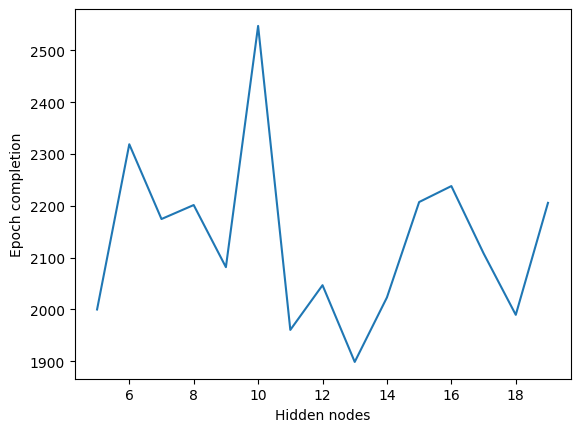

hidden_nodes  5
Training is klaar bij epoch:  1239
Cost:  0.0009982601888454876
hidden_nodes  5
Training is klaar bij epoch:  1765
Cost:  0.0009988886701761722
hidden_nodes  5
Training is klaar bij epoch:  1924
Cost:  0.0009992299184591043
hidden_nodes  5
Training is klaar bij epoch:  1988
Cost:  0.000999566506514165
hidden_nodes  5
Training is klaar bij epoch:  3118
Cost:  0.000999770864242771
hidden_nodes  5
Training is klaar bij epoch:  1653
Cost:  0.0009992223446077346
hidden_nodes  5
Training is klaar bij epoch:  2565
Cost:  0.0009996673634308179
hidden_nodes  5
Training is klaar bij epoch:  1777
Cost:  0.0009981371520018294
hidden_nodes  5
Training is klaar bij epoch:  1679
Cost:  0.0009988953820782604
hidden_nodes  5
Training is klaar bij epoch:  2292
Cost:  0.0009992645437400935
hidden_nodes  6
Training is klaar bij epoch:  2499
Cost:  0.0009999913368949028
hidden_nodes  6
Training is klaar bij epoch:  2897
Cost:  0.000999397344986112
hidden_nodes  6
Training is klaar bij epoch

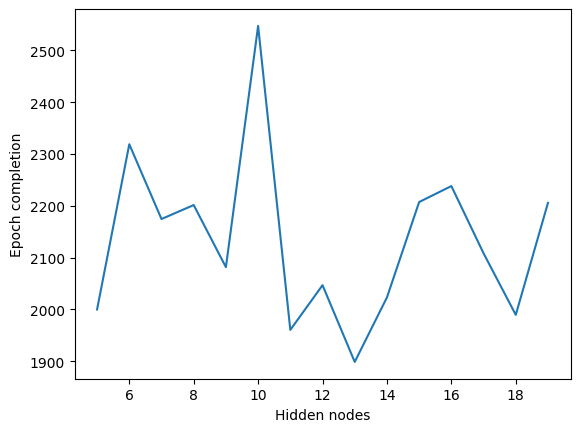

In [114]:

input_size = 9
output_size = 2
hidden_size = 12
learning_rate = 0.1
epochs = 20000
maxCost = 0.001  

# input_node = np.zeros(input_size).reshape(-1, 1)
# hidden_nodes = np.zeros(hidden_size).reshape(-1, 1)
# output_nodes = np.zeros(output_size).reshape(-1, 1)
# weights_input = np.random.rand(input_size, hidden_size)
# weights_hidden = np.random.rand(hidden_size, output_size)

# bias_output = np.zeros((output_size, 1)).reshape(1, -1)
# bias_hidden = np.zeros((hidden_size, 1)).reshape(1, -1)

epochdata = [[],[]]
for i in range(5,20):
    avg_epoch = 0
    for j in range(10):
        
        input_node = np.zeros(input_size).reshape(-1, 1)
        # hidden_nodes = np.zeros(hidden_size).reshape(-1, 1)
        output_nodes = np.zeros(output_size).reshape(-1, 1)
        weights_input = np.random.rand(input_size, hidden_size)
        weights_hidden = np.random.rand(hidden_size, output_size)

        bias_output = np.zeros((output_size, 1)).reshape(1, -1)
        bias_hidden = np.zeros((hidden_size, 1)).reshape(1, -1)


        print("hidden_nodes ", i)
        hidden_nodes = np.zeros(i).reshape(-1, 1)
        avg_epoch += train(learning_rate, epochs)

    epochdata[0].append(i)
    epochdata[1].append(avg_epoch/10)

plt.xlabel("Hidden nodes")
plt.ylabel("Epoch completion")
plt.plot(epochdata[0], epochdata[1])

# figure, axis = plt.subplots(1,len(test_set)) 
# for i in range(len(test_set)):
#     inputs = np.array(test_set[i][0]).flatten()
    
#     prediction = predict(inputs)
#     # print("prediction", prediction)

#     axis[i].imshow(test_set[i][0])
#     antwoord = "O" if prediction[0] > prediction[1] else "X"
#     title  = f"{test_set[i][1]}: {antwoord}"
#     axis[i].set_title(title)   